In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### [Air Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Air+Quality)
#### Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

#### Data Set description:

- 0 Date (DD/MM/YYYY)
- 1 Time (HH.MM.SS)
- 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- 7 True hourly averaged NOx concentration in ppb (reference analyzer)
- 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
- 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
- 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- 12 Temperature in Â°C
- 13 Relative Humidity (%)
- 14 AH Absolute Humidity

#### Analysis

The variable to be worked on is the PT08.S1(CO)  

### Dataset overview

In [2]:
# Load the data set
df = pd.read_excel('data/AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
# Display the types of each column
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [4]:
# Summary statistics of each column
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


By the description of the dataset it's clear how the missing values (tagged with -200.000 value) are affecting the overall dataset as it's the min for all variables.

### Cleaning missing data

In [5]:
# replace all -200 with NaN
df.replace(-200, np.NaN, inplace=True)

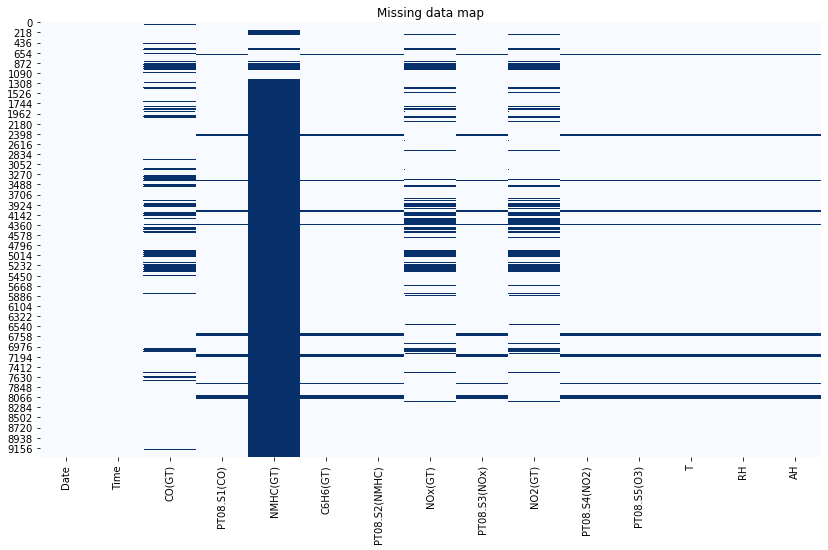

In [6]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isna(), cbar=False, cmap="Blues").set_title("Missing data map")
plt.show()

In [7]:
# Percentage of missing values per column
nan_perc = df.isna().sum()/len(df.index)*100
nan_perc

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

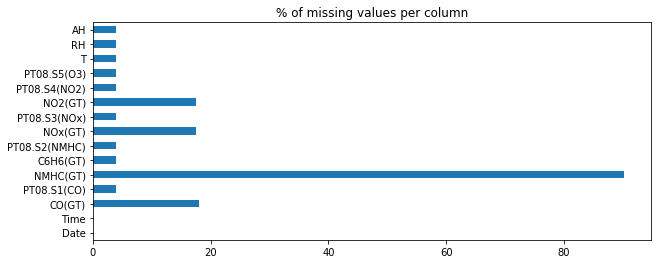

In [8]:
plt.figure(figsize=(10,4))
nan_perc.plot.barh().set_title('% of missing values per column')
plt.show()

* The concentration of missing values on variable **NMHC(GT)** is considerably high (over 90%).
* Columns **NOx(GT)** and **NO2(GT)** seems correlatated regarding missing data.
* The columns **PT08.S1(CO)**, **C6H6(GT)**, **PT08.S2(NMHC)**, **PT08.S3(NOx)**, **PT08.S4(NO2)**, **PT08.S5(O3)**, **T**, **RH**, **AH**, are also higly correlated on their missing data patterns.   
<br><br>
Due to the high concentration of missing values in **NMHC(GT)** it makes sense to drop this column. <br>
Three other columns also display a high concentration of missing values **CO(GT), NOx(GT), NO2(GT)** of over 17% and these missing values will be filled with the last valid observation.


In [9]:
# Drop column which is full of missing values
df.drop(columns=['NMHC(GT)'], inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [10]:
# Fill missing values of all other columns
df.fillna(method='ffill', inplace=True)

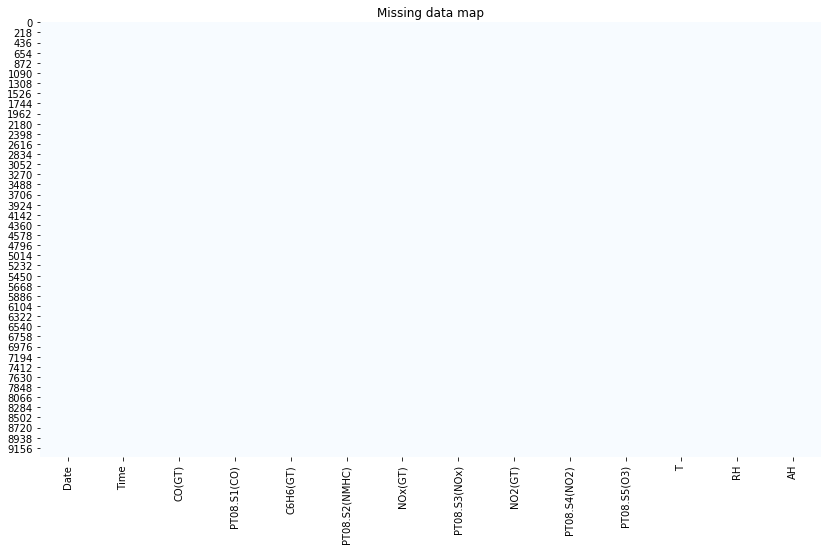

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isna(), cbar=False, cmap="Blues").set_title("Missing data map")
plt.show()

All missing values were gone!

### Dealing with outliers

[]

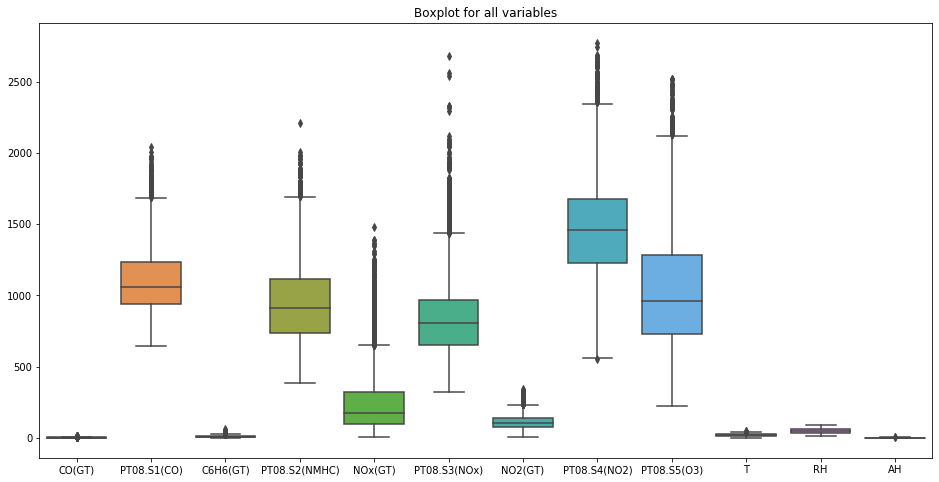

In [12]:
# showing the boxplot for all variables (except Date and Time)
plt.figure(figsize=(16,8))
sns.boxplot(data=df.loc[:, 'CO(GT)':'AH']).set_title("Boxplot for all variables")
plt.plot()

By the boxplot it's clear there're some outliers.<br>
Q1 and Q3 are the lower and upper quartiles respectively.<br>

Considering the [inner fences](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) to detect outliers:<br>
lower inner fence: Q1 - 1.5*IQ<br>
upper inner fence: Q3 + 1.5*IQ

In [13]:
# go through all the columns (starting from column CO(GT)),
# calculate the outlier's fences and mark as null each value that
# goes beyond these limitations.

for col in df.columns[2:]:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    lower_f = q1 - 1.5*q1
    upper_f = q3 + 1.5*q3
    
    df[col] = df[col].apply(lambda x: np.nan if ((x<lower_f) or (x>upper_f)) else x)

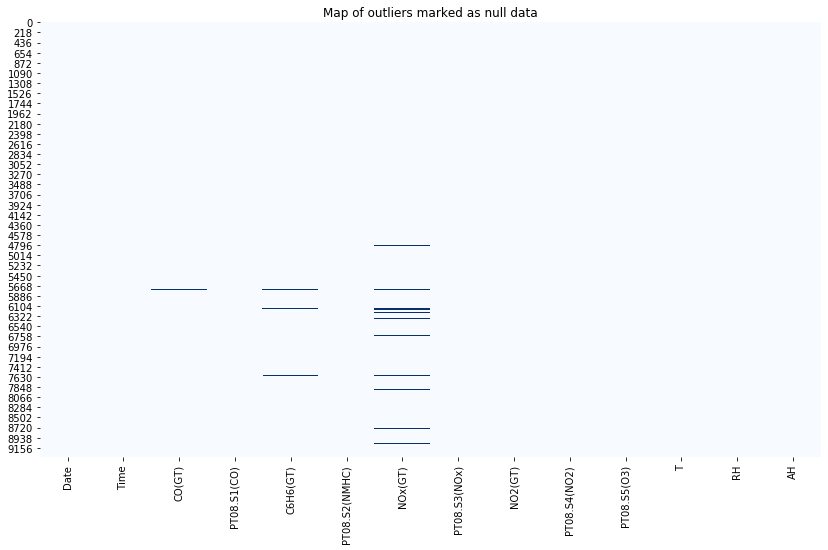

In [14]:
# plot the new map of outliers (marked as null data)
plt.figure(figsize=(14,8))
sns.heatmap(df.isna(), cbar=False, cmap="Blues").set_title("Map of outliers marked as null data")
plt.show()

In [15]:
# Percentage of missing values per column
nan_perc = df.isna().sum()/len(df.index)*100
nan_perc

Date             0.000000
Time             0.000000
CO(GT)           0.705354
PT08.S1(CO)      0.000000
C6H6(GT)         0.897724
PT08.S2(NMHC)    0.000000
NOx(GT)          2.532863
PT08.S3(NOx)     0.032062
NO2(GT)          0.000000
PT08.S4(NO2)     0.000000
PT08.S5(O3)      0.000000
T                0.000000
RH               0.000000
AH               0.000000
dtype: float64

For these outliers the choice will be the same regarding missing values, propagate the last valid observation forward.

In [16]:
# Fill outliers with last valid observation
df.fillna(method='ffill', inplace=True)

### Visualizing the CO concentration patterns regarding time.

In [17]:
# Create a column with the day of the week names for each date
df['DayofWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DayofWeek
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,Wednesday
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,Wednesday
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,Wednesday
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,Wednesday
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,Wednesday


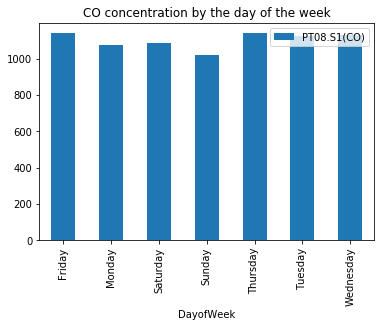

In [18]:
# Print the mean of CO concentration by the day of the week
weekday_grp = df.groupby(['DayofWeek'])
weekday_grp[['Time','PT08.S1(CO)']].mean().plot.bar().set_title('CO concentration by the day of the week')
plt.show()

The concentration of CO on Sunday is reduced compared to the other days of the week as can be seen in the barplot above.<br>
It'll be interesting to see a sequence of the plots for the mean concentration on each day. 

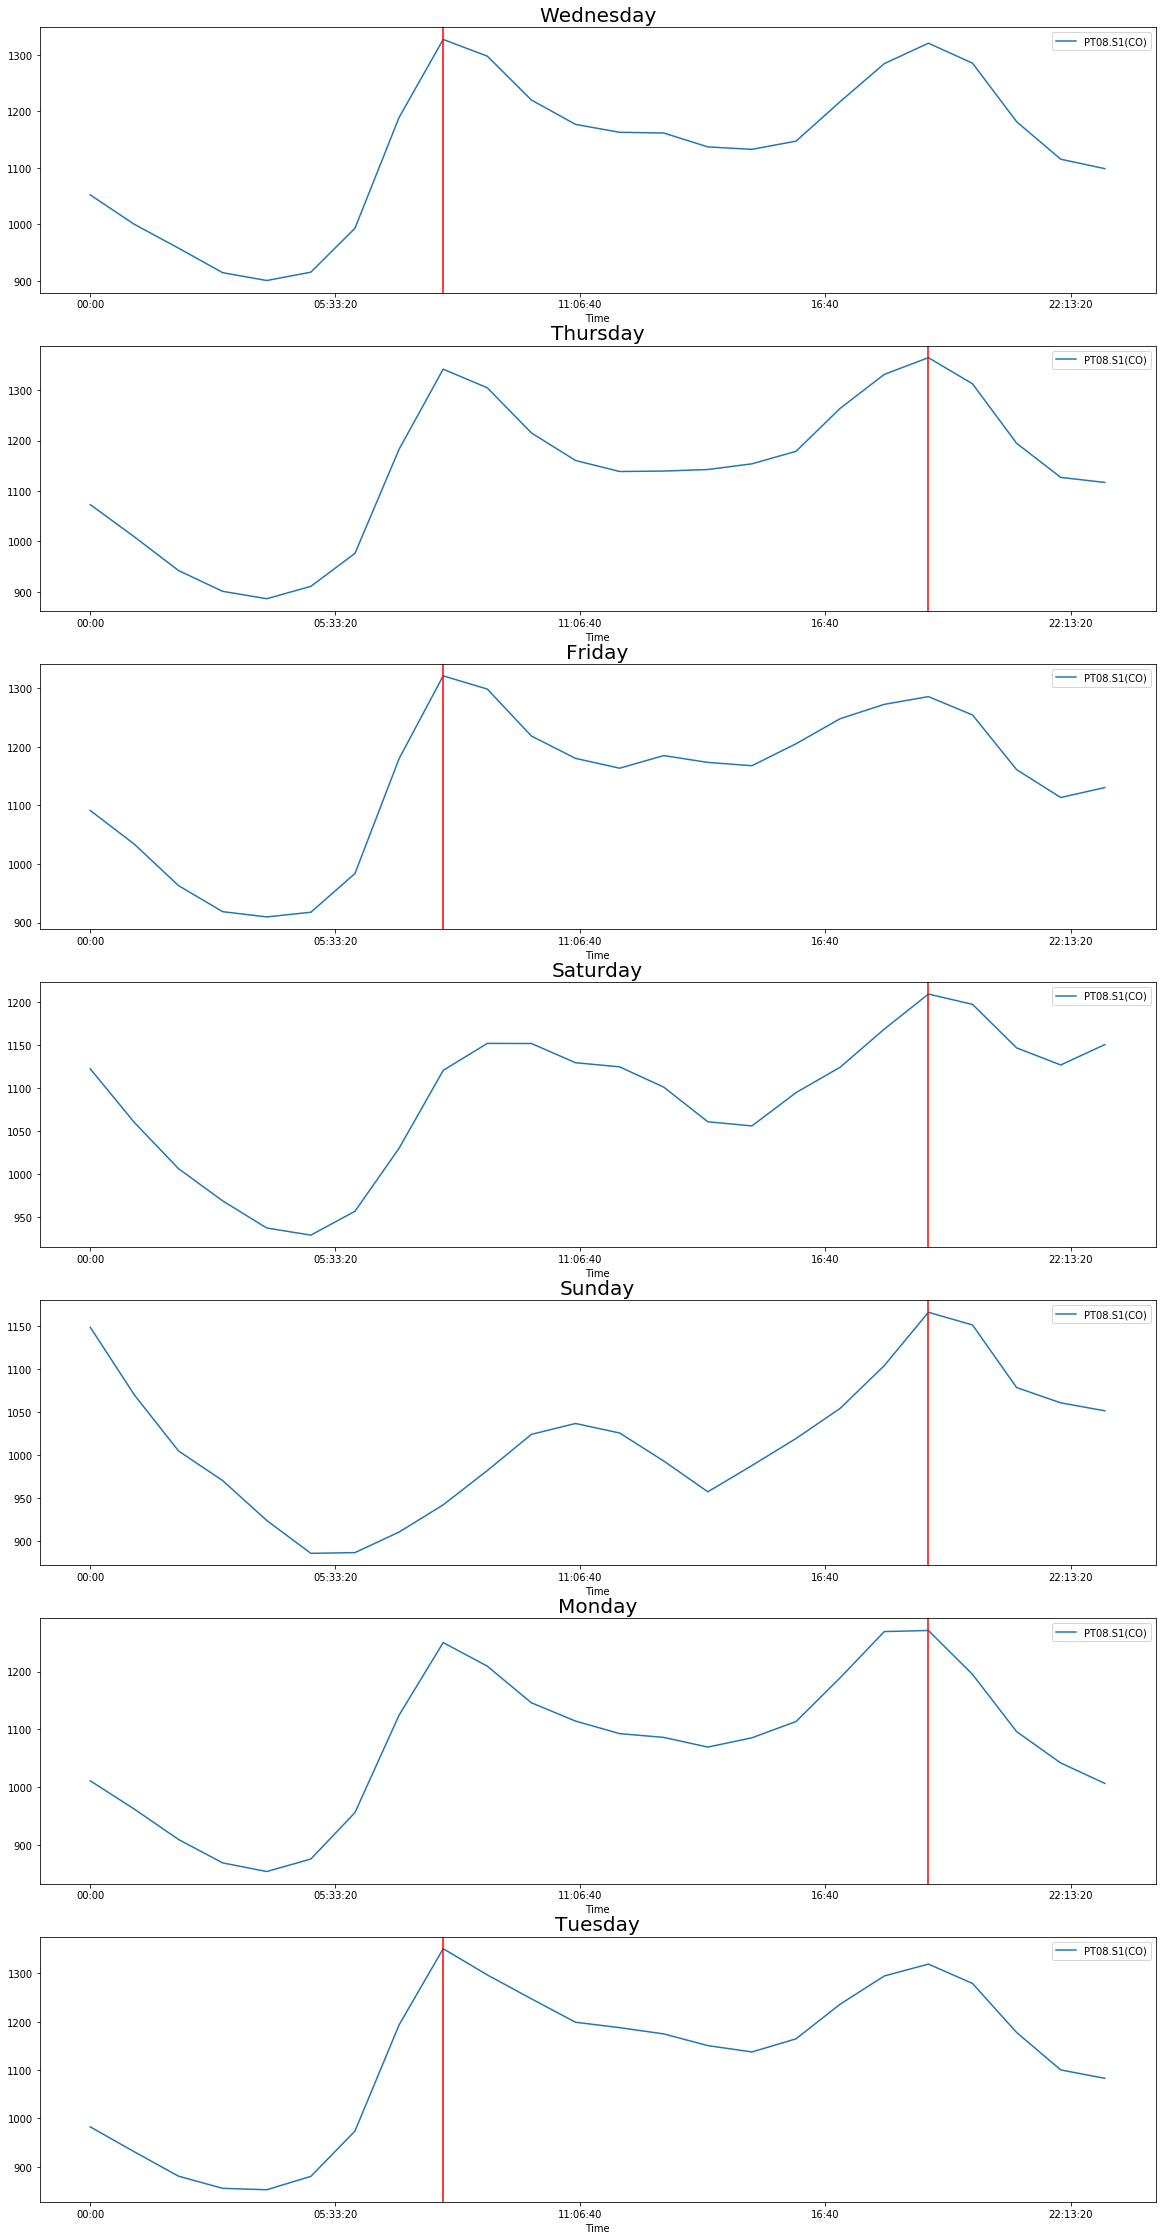

In [19]:
# Plot the mean of CO concentration per weekday
fig, axes = plt.subplots(7, 1, figsize=(20,40))

i=0
for wday in df['DayofWeek'].unique():
    tmp_grp = weekday_grp[['Time','PT08.S1(CO)']].get_group(wday)
    daymean = tmp_grp.groupby('Time')
    daymean.mean().plot(ax=axes[i]).set_title(wday, fontsize=20)
    axes[i].axvline(x=daymean.mean().idxmax()[0], color='red')
    i += 1

On the plots above each day is marked by a vertical red line in its maximum value.<br> 
It's noticeable that everyday has two peaks, one in the morning and the other by the end of afternoon. These correspond with the rush time.<br> 
The graphs for Saturday and Sunday show smaller peaks, especially in the Sunday morning. 